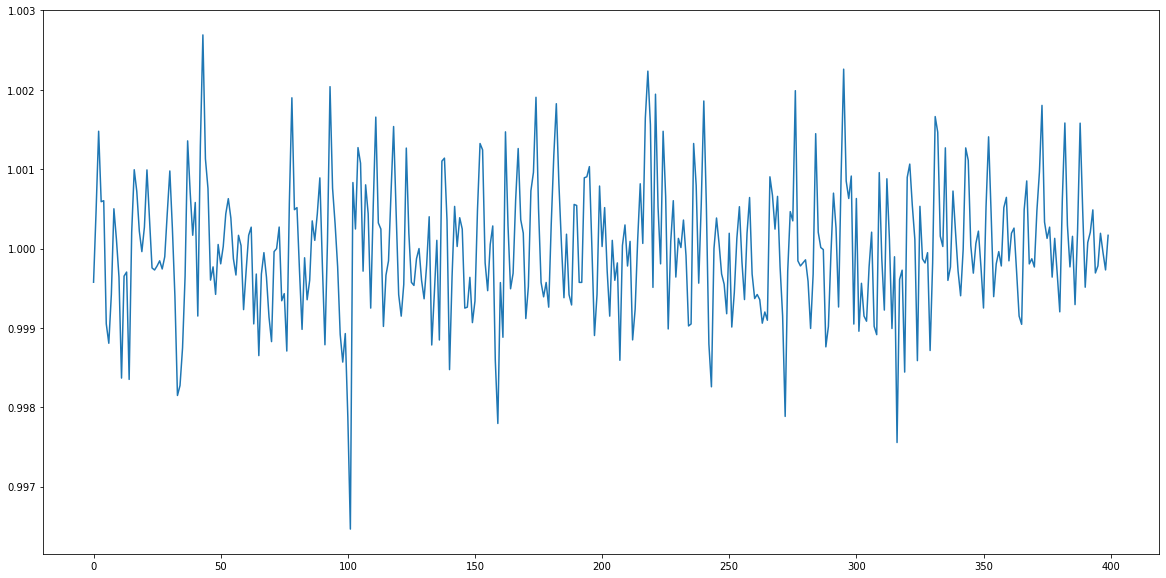

In [882]:
# Valores delta
#
#
#import matplotlib.pyplot as plt
import json, numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

with open('../datasets/eth-usdt-1m.json') as datafile:
  data = json.load(datafile)

avg = np.array([item['avg_price'] for item in data])

kappa = lambda k: k - 1 if k > 1.0 else 1+(-1/k)
dekappa = lambda k: k + 1 if k > 0.0 else (-1/(k-1))
kappas = lambda vals: np.array([ kappa(val) for idx, val in enumerate(vals) if idx > 1])
dekappas = lambda vals: np.array([ dekappa(val) for idx, val in enumerate(vals) if idx > 1])
deltas = lambda vals: np.array([ val / vals[idx-1] for idx, val in enumerate(vals) if idx > 1])

d = deltas(avg)
t = track(d)

def scat(*args, **kw):
    return list(map(lambda x: x-FROM, args)), list(t[x] for x in args)


plt.plot(d[100:500])

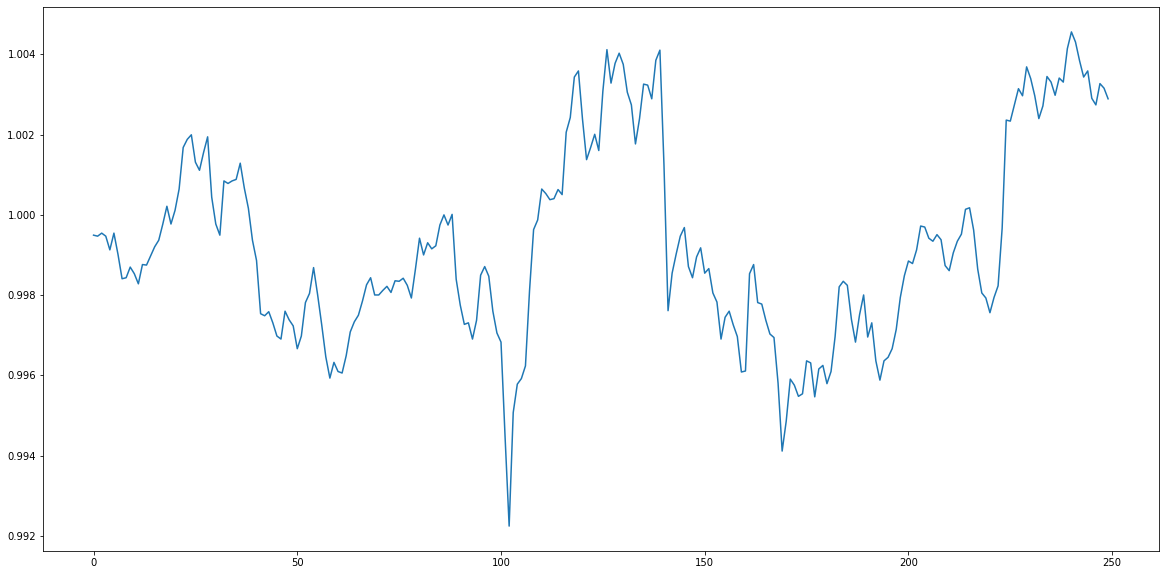

In [849]:
def track(deltas):
    res = np.zeros(len(deltas))
    acc = 1.0
    for i, delta in enumerate(deltas):
        acc *= delta
        res[i] = acc
    return res


plt.plot(track(deltas(avg))[0:250] )

    

1.0112486654125783

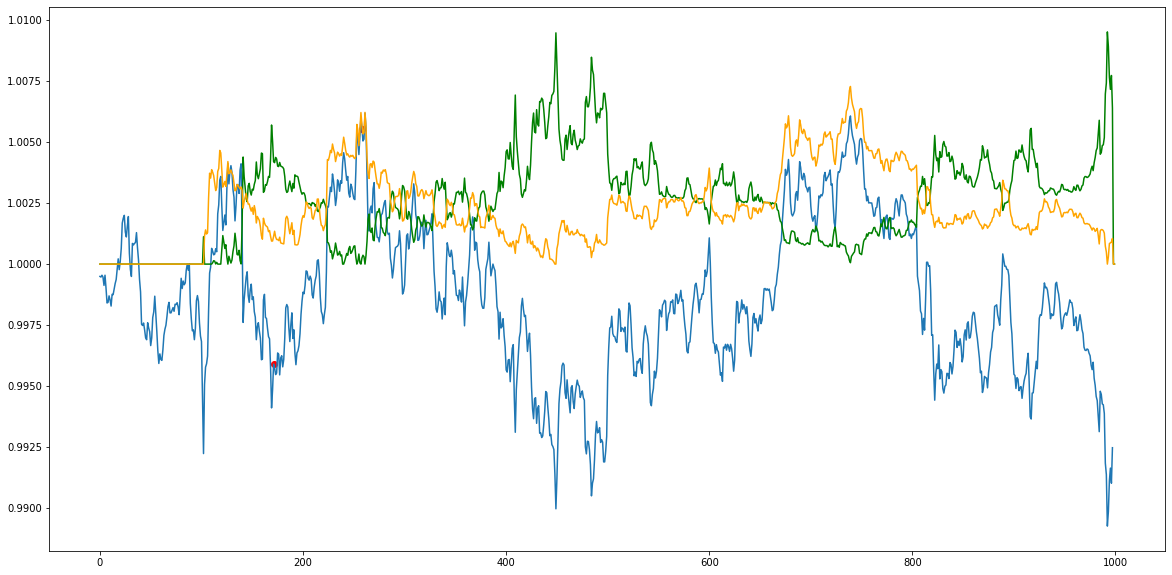

In [748]:
# evaluar por cada compra en Tb, el mejor momento de venta Ts (las penalizaciones se evaluan por separado, ya)
#  que son efectuadas en ambas partes del reciproco.
FROM, TO = 0, 1000
buy = np.ones(len(avg))
buy_div = np.ones(len(avg))
sell = np.ones(len(avg))
sell_div = np.ones(len(avg))
probes = np.ones(len(avg))


threshold = 1.0
penalty = .990
LIFETIME = 10

for tb in range(102, len(d)):
    acc = 1.0
    tz = t[tb]
    
    cross_buy = False
    cross_sell = False
    
    for ts in range(tb, len(d)):
        acc *= d[ts]
       
        #if acc < 1.0:
        if acc < threshold: 
            # loss -> buy report
            buy[ts] += 1/acc
            buy_div[ts] += 1
            cross_buy = True
        #elif acc > 1.0 and cross_buy:
        elif acc > (1/threshold):
            # gain -> sell report
            sell[ts] += acc
            sell_div[ts] += 1
            cross_sell = True
        else:
            if cross_buy and cross_sell:
                break
            if ts - tb > LIFETIME:
                break
        probes[ts] += 1
        

plt.plot(t[FROM:TO])
plt.plot((buy/buy_div)[FROM:TO], color="green")
plt.plot((sell/sell_div)[FROM:TO], color="orange")


1.0

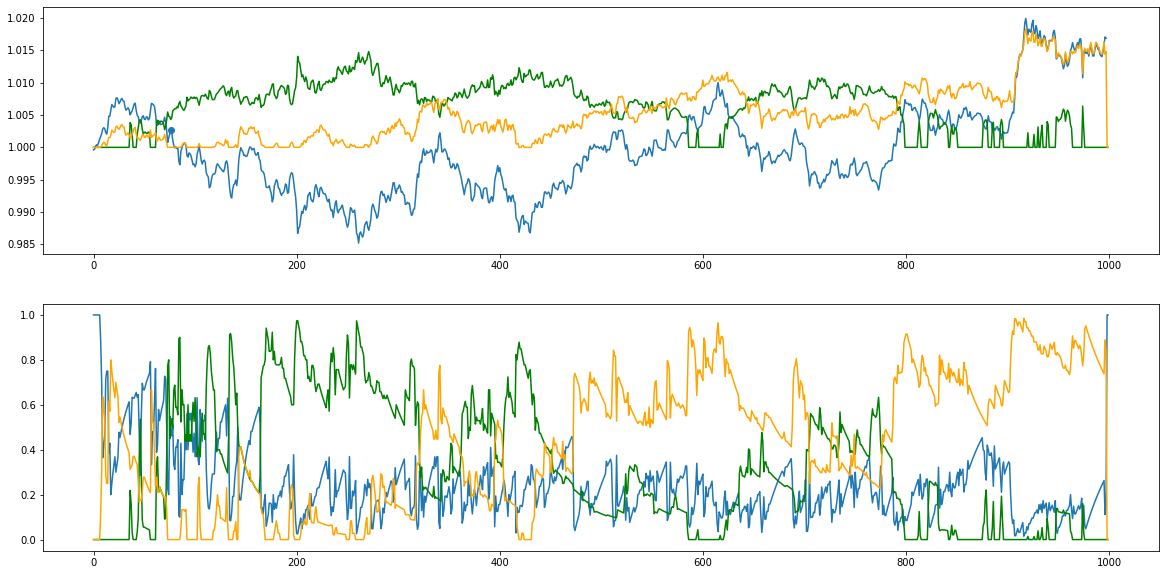

In [892]:
# evaluar por cada compra en Tb, el mejor momento de venta Ts (las penalizaciones se evaluan por separado, ya)
#  que son efectuadas en ambas partes del reciproco.
FROM, TO = 0, 1000
buy = np.ones(len(avg))
buy_probes = np.zeros(len(avg))
buy_div = np.ones(len(avg))
sell = np.ones(len(avg))
sell_probes = np.zeros(len(avg))
sell_div = np.ones(len(avg))
probes = np.ones(len(avg))
risk = np.ones(len(avg))

d = deltas(avg)
t = track(d)

buy_penalty = .999*.999
sell_penalty = 1/buy_penalty
VIEW = 0.0
for tb in range(0, len(d)):
#for tb in range(50, 51):
#for tb in [150]:
    acc = 1.0
    cross_buy = False
    cross_sell = False
    
    for ts in range(tb, len(d)):
        acc *= d[ts]

        if tb ==0 and ts == 13: 
            VIEW = acc

        probes[ts] += 1
        if acc < buy_penalty and not cross_sell:  
            buy[ts] += 1/(acc * .999*.999)
            buy_probes[ts] += 1
            buy_div[ts] += 1
            cross_buy = True
        elif acc > sell_penalty and not cross_buy:
            sell[ts] += acc * .999*.999
            sell_probes[ts] += 1
            sell_div[ts] += 1
            cross_sell = True
        else:
            risk[ts] += 1;
            if cross_buy or cross_sell:
                break
            #if ts - tb > LIFETIME:
                #break

fig, grid = plt.subplots(2,1)
grid[0].plot(t[FROM:TO])
grid[0].plot((buy/buy_div)[FROM:TO], color="green")
grid[0].plot((sell/sell_div)[FROM:TO], color="orange")

grid[1].plot((risk/probes)[FROM:TO])
grid[1].plot((buy_probes/probes)[FROM:TO], color="green")
grid[1].plot((sell_probes/probes)[FROM:TO], color="orange")

#grid[0].scatter(*scat(*PROBES), color="")
#grid[1].plot((probes)[FROM:TO], color="red")

grid[0].scatter(*scat(76))
buy[30]/buy_div[30]

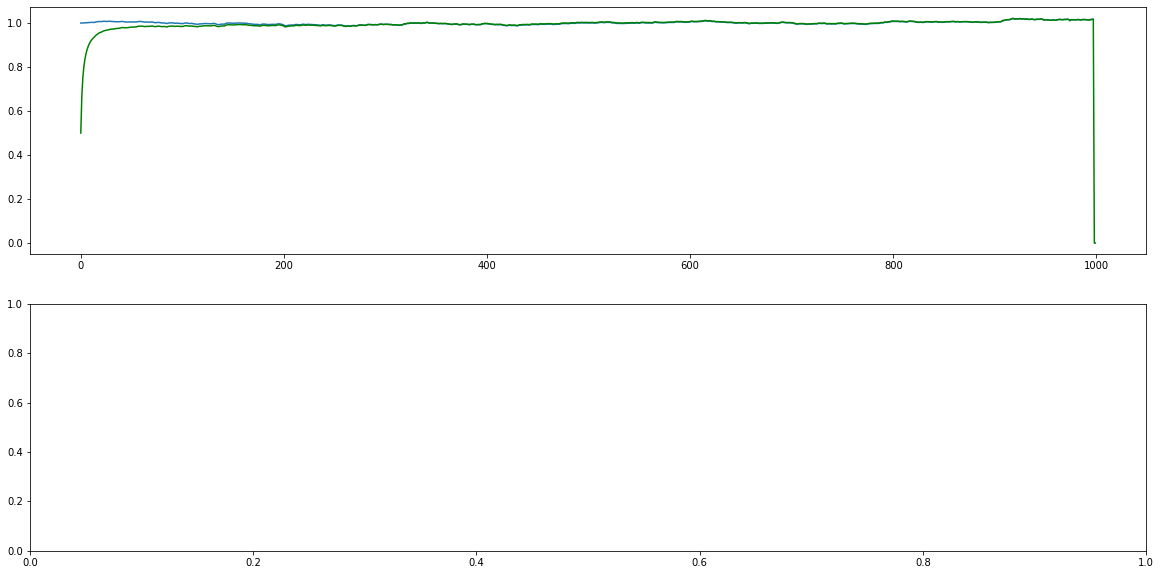

In [897]:
# evaluar por cada compra en Tb, el mejor momento de venta Ts (las penalizaciones se evaluan por separado, ya)
#  que son efectuadas en ambas partes del reciproco.
FROM, TO = 0, 1000
delfos = np.zeros(len(avg))
div = np.zeros(len(avg))

d = deltas(avg)
t = track(d)

for tb in range(0, len(d)):
    acc = 1.0
    
    for ts in range(tb, len(d)):
        acc *= d[ts]
        delfos[ts] += acc
        div[ts] += 1

fig, grid = plt.subplots(2,1)
grid[0].plot(t[FROM:TO])
grid[0].plot((delfos/div)[FROM:TO], color="green")

grid[0].scatter(*scat(76))
buy[30]/buy_div[30]